# Тестовое задание на позицию **Младший исследователь данных (DS) / стажер**

#### Кандидат: Паламарчук Ярослав Владимирович

## Задание

Руководство компании обратило внимание на то, что сотрудники старше 35 
лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин 
количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. 
В связи с этой ситуацией, руководство организации планирует ввести 
дополнительные медицинские осмотры среди групп риска. 
Вам необходимо проверить следующие гипотезы:
1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по 
болезни значимо чаще женщин.
2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих 
дней (work_days) по болезни значимо чаще своих более молодых коллег.
Все необходимые данные содержатся в файле «М.Тех_Данные_к_ТЗ_DS».

Решение необходимо предоставить:
1) В виде jupyter notebook (с аккуратно оформленным кодом, графиками и описанной логикой решения).
2) В виде дашборда на Streamlit с простым функционалом: 
   1. должна быть возможность загрузить .csv, в формате аналогично 
   файлу «Статистика»
   2. должна быть возможность задать параметры age и work_days
   3. указан результат проверки гипотез
   4. указана логика получения результата (должны быть отрисованы 
графики распределений, указаны критерии проверки (стат. тесты, 
статистики, уровень значимости т.п.) 


Код проекта должен быть обернут в docker выложен в Gitlab/Github репозиторий
предоставлена ссылка на него, сохраненная в файл формата .doc, .docx, .pdf, tss. Файл 
назови по следующему принципу: Фамилия_Имя_Название_вакансии. Будет 
обращаться внимание на качество кода, код стайл, оформление ноутбука, кода и 
репозитория. Будет плюсом, если дашборд будет поднят на сервере и на него будет 
предоставлена ссылка.

# Решение

### Import libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Load data

In [20]:
file_path = 'М.Тех_Данные_к_ТЗ_DS.csv'
data = pd.read_csv(file_path, encoding='windows-1251')

data.head()

,"Количество больничных дней,""Возраст"",""Пол"""
0,"5,39,""Ж"""
1,"4,54,""М"""
2,"4,26,""М"""
3,"5,42,""М"""
4,"4,29,""М"""


## Data preprocessing

In [21]:
data[['work_days', 'age', 'gender']] = data['Количество больничных дней,"Возраст","Пол"'].str.split(',', expand=True)

data['work_days'] = data['work_days'].astype(int)
data['age'] = data['age'].astype(int)
data['gender'] = data['gender'].replace(['"М"','"Ж"'], ['m','f'])

data.drop(['Количество больничных дней,"Возраст","Пол"'], axis=1, inplace=True)

data.head()

,work_days,age,gender
0,5,39,f
1,4,54,m
2,4,26,m
3,5,42,m
4,4,29,m


## Data analysis

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   work_days  237 non-null    int32 
 1   age        237 non-null    int32 
 2   gender     237 non-null    object
dtypes: int32(2), object(1)
memory usage: 3.8+ KB


In [26]:
data.isna().sum()

work_days    0
age          0
gender       0
dtype: int64

#### Distribution

In [22]:
data.describe()

,work_days,age
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


#### Gender

In [31]:
data.gender.value_counts()

gender
m    139
f     98
Name: count, dtype: int64

#### Age

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


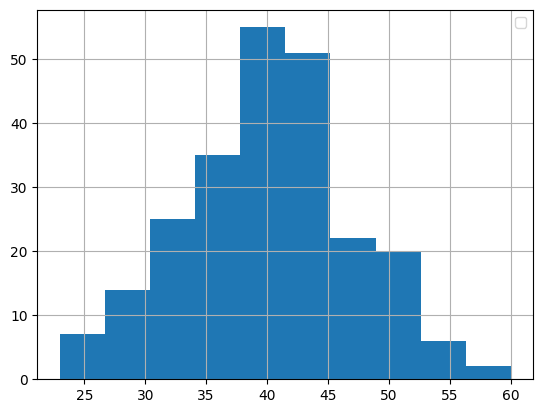

In [47]:
data.age.hist()

In [35]:
data.age[data.age >= 35].count(), data.age[data.age < 35].count()

(191, 46)

Данные не сбалансированы. Мужчин почти в полтора раза больше чем женщин, сотрудников старше 35 лет почти в 4 раза больше остальных.

## Visualization

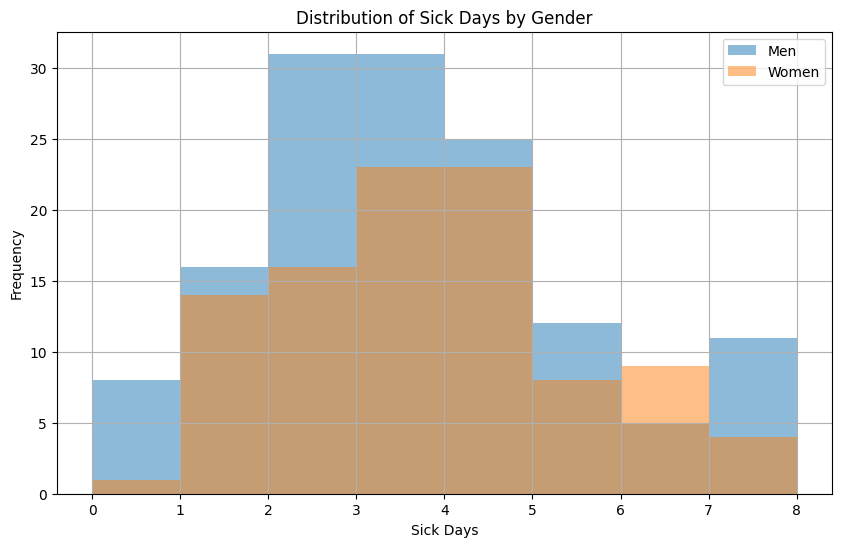

In [29]:
# Distribution of sick days by gender
plt.figure(figsize=(10, 6))
data[data['gender'] == 'm']['work_days'].hist(alpha=0.5, label='Men', bins=8)
data[data['gender'] == 'f']['work_days'].hist(alpha=0.5, label='Women', bins=8)
plt.title('Distribution of Sick Days by Gender')
plt.xlabel('Sick Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Судя по графику, может показаться, что мужчины пропускают больше дней по больничным, чем женщины. Но в выборке мужчин больше, поэтому однозначно сказать нельзя

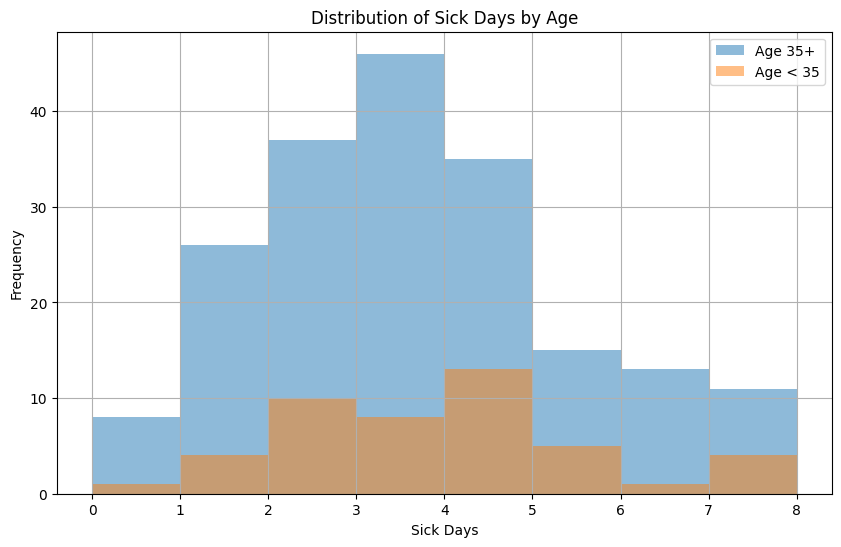

In [30]:
# Distribution of sick days by age
plt.figure(figsize=(10, 6))
data[data['age'] >= 35]['work_days'].hist(alpha=0.5, label='Age 35+', bins=8)
data[data['age'] < 35]['work_days'].hist(alpha=0.5, label='Age < 35', bins=8)
plt.title('Distribution of Sick Days by Age')
plt.xlabel('Sick Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Аналогично, кажется, что люди старше 35 лет пропускают больше дней по больничным, чем молодые, но снова присутствует дисбаланс в выборке, поэтому однозначно сказать нельзя

## Hypothesis testing

Уровень значимости $ \alpha = 0.05 $

Статистический критерий: t-критерий Стьюдента для независимых выборок.

t-критерий Стьюдента для независимых выборок или t-test позволяет проверить гипотезу о равенстве средних значений в двух независимых выборках, то есть ответить на вопрос, существует ли статистически значимая разница между выборками. 

Если p-value меньше уровня значимости, то нулевая гипотеза отвергается, то есть можно с определенной достоверностью считать, что между выборками есть статистически значимая разница.


### Гипотеза 1

H0: Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни так же часто, как и женщины 

H1: Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин


### Гипотеза 2

H0: Работники старше 35 лет пропускают в течение года более 2 рабочих дней (work_days) по болезни так же часто, как и молодые

H1: Работники старше 35 лет пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще молодых


In [46]:
# Hypothesis 1
data_men = data[data['gender'] == 'm']
data_women = data[data['gender'] == 'f']
ttest_result_gender = ttest_ind(data_men['work_days'], data_women['work_days'], equal_var=False)
print('Hypothesis 1 - Men vs Women:\n', ttest_result_gender)

# Hypothesis 2
data_older = data[data['age'] >= 35]
data_younger = data[data['age'] < 35]
ttest_result_age = ttest_ind(data_older['work_days'], data_younger['work_days'], equal_var=False)
print('Hypothesis 2 - Age 35+ vs Age < 35:\n', ttest_result_age)

Hypothesis 1 - Men vs Women:
 TtestResult(statistic=-0.800985603738584, pvalue=0.4239959914355369, df=222.10444348918975)
Hypothesis 2 - Age 35+ vs Age < 35:
 TtestResult(statistic=-0.9416437678927063, pvalue=0.3496119728290893, df=70.03266410713353)


## Conclusion

В обоих случаях p-value > 0.05, поэтому нулевые гипотезы не отвергаются, то есть можно считать, что между выборками нет статистически значимой разницы.

Обе гипотезы не подтвердились